In [ ]:

    Object detection using pretrained tensorflow models

In [198]:
import cv2
import tensorflow_hub 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def read_image_and_resize(input_file, desired_width, desired_height):
    img = cv2.imread(input_file)
    #img = cv2.imread('scissors.jpeg')
    #desired_height = 640
    #desired_width = 640
    resized_img = cv2.resize(img,(desired_width,desired_height))
    return resized_img

    

In [20]:
def convert_image_to_tensor(img):
    image_tensor = tf.convert_to_tensor(img, dtype=tf.uint8)
    image_tensor = tf.expand_dims(image_tensor , 0)
    return image_tensor

In [15]:
def load_pretrained_model(model_name):
    #model = tf.keras.models.load_model('faster_rcnn_inception_resnet_v2_640x640_1')
    #model = tensorflow_hub.load("https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_640x640/1")
    
    #model = tf.keras.models.load_model('efficientdet_lite2_detection_1')
    #model = tensorflow_hub.load("https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1")
    
    # option 1 download the model file from https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_1024x1024/1
    # download to same folder as this notebook, untar it
    
    model = tf.keras.models.load_model(model_name)
    
    #option 2 load the model from tensorflow hub 
    #model = tensorflow_hub.load(model_name)
    
    return model

    

In [90]:
#download 2017 Train/Val annotations [241MB] from https://cocodataset.org/#download
# unzip
import json
def read_coco_class_labels():
    f = open('annotations/instances_train2017.json')
    json_data = json.loads(f.read())
    classes = json_data['categories']
    #print ('classes',classes)
    class_dict={}
    for c in classes:
        class_dict[c['id']]= c['name']
    print ('class_dict',class_dict)
    return class_dict
    

In [15]:
read_coco_class_labels()

class_dict {1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear', 24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag', 32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove', 41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle', 46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon', 51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse', 75: 'remote', 76: 'keyboard', 77: 'cell phone',

{1: 'person',
 2: 'bicycle',
 3: 'car',
 4: 'motorcycle',
 5: 'airplane',
 6: 'bus',
 7: 'train',
 8: 'truck',
 9: 'boat',
 10: 'traffic light',
 11: 'fire hydrant',
 13: 'stop sign',
 14: 'parking meter',
 15: 'bench',
 16: 'bird',
 17: 'cat',
 18: 'dog',
 19: 'horse',
 20: 'sheep',
 21: 'cow',
 22: 'elephant',
 23: 'bear',
 24: 'zebra',
 25: 'giraffe',
 27: 'backpack',
 28: 'umbrella',
 31: 'handbag',
 32: 'tie',
 33: 'suitcase',
 34: 'frisbee',
 35: 'skis',
 36: 'snowboard',
 37: 'sports ball',
 38: 'kite',
 39: 'baseball bat',
 40: 'baseball glove',
 41: 'skateboard',
 42: 'surfboard',
 43: 'tennis racket',
 44: 'bottle',
 46: 'wine glass',
 47: 'cup',
 48: 'fork',
 49: 'knife',
 50: 'spoon',
 51: 'bowl',
 52: 'banana',
 53: 'apple',
 54: 'sandwich',
 55: 'orange',
 56: 'broccoli',
 57: 'carrot',
 58: 'hot dog',
 59: 'pizza',
 60: 'donut',
 61: 'cake',
 62: 'chair',
 63: 'couch',
 64: 'potted plant',
 65: 'bed',
 67: 'dining table',
 70: 'toilet',
 72: 'tv',
 73: 'laptop',
 74: 'mo

In [211]:
def predict_classes_and_boxes(model_name, img_tensor):
    predictor = load_pretrained_model(model_name)
    if model_name == 'efficientdet_lite2_detection_1':
        boxes, scores, classes_id, num_detections = predictor(img_tensor) 
        
    if model_name == 'faster_rcnn_inception_resnet_v2_640x640_1':
        prediction = predictor(img_tensor) 
        boxes = prediction['detection_boxes']
        scores = prediction['detection_scores']
        classes_id = prediction['detection_classes']
        num_detections = prediction['num_detections']
    return boxes, scores, classes_id, num_detections 

#num_detections: a tf.int tensor with only one value, the number of detections [N].
#detection_boxes: a tf.float32 tensor of shape [N, 4] containing bounding box coordinates in the following order: [ymin, xmin, ymax, xmax].
#detection_classes: a tf.int tensor of shape [N] containing detection class index from the label file.
#detection_scores: a tf.float32 tensor of shape [N] containing detection scores.


# efficientdet_lite2_detection_1 on scissors

In [199]:
input_file='scissors.jpeg'

#model_name = 'https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1'
model_name = 'efficientdet_lite2_detection_1'
#model_name = 'faster_rcnn_inception_resnet_v2_640x640_1'
#if model_name == 'https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1':
if model_name == 'efficientdet_lite2_detection_1':
    desired_width = 448
    desired_height = 448
if model_name == 'faster_rcnn_inception_resnet_v2_640x640_1':
    desired_width = 640
    desired_height = 640
resized_img = read_image_and_resize(input_file, desired_width, desired_height)
image_tensor = convert_image_to_tensor(resized_img)
boxes, scores, classes_id, num_detections = predict_classes_and_boxes(model_name, image_tensor)






top_bounding_box_y_min 61
top_bounding_box_x_min 155
top_bounding_box_y_max 331
top_bounding_box_x_max 320


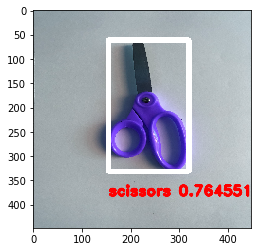

In [201]:
class_dict = read_coco_class_labels()
top_class_label= class_dict[classes_id[0][0].numpy()]
top_class_label
bounding_boxes =boxes[0]
top_bounding_box = bounding_boxes[0].numpy()

top_bounding_box_y_min = int(top_bounding_box[0])
top_bounding_box_x_min = int(top_bounding_box[1])
top_bounding_box_y_max = int(top_bounding_box[2])
top_bounding_box_x_max = int(top_bounding_box[3])
print ('top_bounding_box_y_min',top_bounding_box_y_min)
print ('top_bounding_box_x_min',top_bounding_box_x_min)
print ('top_bounding_box_y_max',top_bounding_box_y_max)
print ('top_bounding_box_x_max',top_bounding_box_x_max)
top_score=scores[0][0]
top_score = top_score.numpy()
resized_img = read_image_and_resize(input_file, desired_width, desired_height)
image_object_box =resized_img.copy()
cv2.rectangle(image_object_box, (top_bounding_box_x_min,top_bounding_box_y_max), (top_bounding_box_x_max,top_bounding_box_y_min), (255,255,255), 10)
cv2.putText(image_object_box, top_class_label +' ' + str(top_score),
                    (top_bounding_box_x_min, top_bounding_box_y_max + 50),
                    cv2.FONT_HERSHEY_DUPLEX,
                    1.0, (255, 0, 0), 3,
                    cv2.LINE_AA)
plt.imshow(image_object_box)

# efficientdet_lite2_detection_1 on face and clock

In [204]:
input_file='face_object_detection.jpg'

#model_name = 'https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1'
model_name = 'efficientdet_lite2_detection_1'
#model_name = 'faster_rcnn_inception_resnet_v2_640x640_1'
#if model_name == 'https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1':
if model_name == 'efficientdet_lite2_detection_1':
    desired_width = 448
    desired_height = 448
if model_name == 'faster_rcnn_inception_resnet_v2_640x640_1':
    desired_width = 640
    desired_height = 640
resized_img = read_image_and_resize(input_file, desired_width, desired_height)
image_tensor = convert_image_to_tensor(resized_img)
boxes, scores, classes_id, num_detections = predict_classes_and_boxes(model_name, image_tensor)


top_class_label person
top_bounding_box_y_min 9
top_bounding_box_x_min 49
top_bounding_box_y_max 447
top_bounding_box_x_max 446
top_score 0.89688945


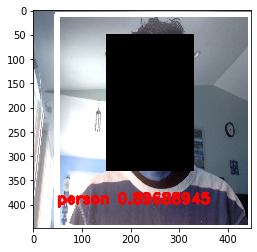

In [208]:
#class_dict = read_coco_class_labels()
top_class_label= class_dict[classes_id[0][0].numpy()]
top_class_label
print ('top_class_label',top_class_label)
bounding_boxes =boxes[0]
top_bounding_box = bounding_boxes[0].numpy()

top_bounding_box_y_min = int(top_bounding_box[0])
top_bounding_box_x_min = int(top_bounding_box[1])
top_bounding_box_y_max = int(top_bounding_box[2])
top_bounding_box_x_max = int(top_bounding_box[3])
print ('top_bounding_box_y_min',top_bounding_box_y_min)
print ('top_bounding_box_x_min',top_bounding_box_x_min)
print ('top_bounding_box_y_max',top_bounding_box_y_max)
print ('top_bounding_box_x_max',top_bounding_box_x_max)
top_score=scores[0][0]
top_score = top_score.numpy()
print ('top_score',top_score)
resized_img = read_image_and_resize(input_file, desired_width, desired_height)
image_object_box =resized_img.copy()
cv2.rectangle(image_object_box, (top_bounding_box_x_min,top_bounding_box_y_max), (top_bounding_box_x_max,top_bounding_box_y_min), (255,255,255), 10)
cv2.putText(image_object_box, top_class_label +' ' + str(top_score),
                    (top_bounding_box_x_min, top_bounding_box_y_max - 50),
                    cv2.FONT_HERSHEY_DUPLEX,
                    1.0, (255, 0, 0), 3,
                    cv2.LINE_AA)
image_object_box[50:330,150:330]=  [0, 0, 0]
plt.imshow(image_object_box)

second_class_label clock
top_bounding_box_y_min 230
top_bounding_box_x_min 394
top_bounding_box_y_max 260
top_bounding_box_x_max 415
second_score 0.45061082


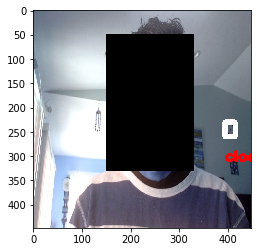

In [210]:
classes_id[0][1]
second_class_label= class_dict[classes_id[0][1].numpy()]
second_class_label
print ('second_class_label',second_class_label)
bounding_boxes =boxes[0]
second_bounding_box = bounding_boxes[1].numpy()

second_bounding_box_y_min = int(second_bounding_box[0])
second_bounding_box_x_min = int(second_bounding_box[1])
second_bounding_box_y_max = int(second_bounding_box[2])
second_bounding_box_x_max = int(second_bounding_box[3])
print ('top_bounding_box_y_min',second_bounding_box_y_min)
print ('top_bounding_box_x_min',second_bounding_box_x_min)
print ('top_bounding_box_y_max',second_bounding_box_y_max)
print ('top_bounding_box_x_max',second_bounding_box_x_max)
second_score=scores[0][1]
second_score = second_score.numpy()
print ('second_score',second_score)
desired_width=448
desired_height=448
resized_img = read_image_and_resize(input_file, desired_width, desired_height)
image_object_box =resized_img.copy()
cv2.rectangle(image_object_box, (second_bounding_box_x_min,second_bounding_box_y_max), (second_bounding_box_x_max,second_bounding_box_y_min), (255,255,255), 10)
cv2.putText(image_object_box, second_class_label +' ' + str(second_score),
                    (second_bounding_box_x_min, second_bounding_box_y_max + 50),
                    cv2.FONT_HERSHEY_DUPLEX,1.0, (255, 0, 0), 3,cv2.LINE_AA)
image_object_box[50:330,150:330]=  [0, 0, 0]
plt.imshow(image_object_box)

# faster_rcnn_inception_resnet_v2_640x640_1 on scissors

In [212]:
input_file='scissors.jpeg'

#model_name = 'https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1'
model_name = 'efficientdet_lite2_detection_1'
model_name = 'faster_rcnn_inception_resnet_v2_640x640_1'
#if model_name == 'https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1':
if model_name == 'efficientdet_lite2_detection_1':
    desired_width = 448
    desired_height = 448
if model_name == 'faster_rcnn_inception_resnet_v2_640x640_1':
    desired_width = 640
    desired_height = 640
resized_img = read_image_and_resize(input_file, desired_width, desired_height)
image_tensor = convert_image_to_tensor(resized_img)
boxes, scores, classes_id, num_detections = predict_classes_and_boxes(model_name, image_tensor)

In [ ]:
# multiply box coordinated by width and height 

top_bounding_box_y_min 91
top_bounding_box_x_min 218
top_bounding_box_y_max 471
top_bounding_box_x_max 455


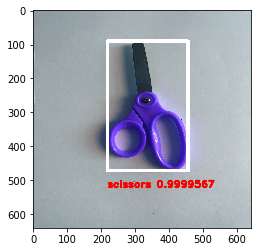

In [213]:
#class_dict = read_coco_class_labels()
top_class_label= class_dict[classes_id[0][0].numpy()]
top_class_label
bounding_boxes =boxes[0]
top_bounding_box = bounding_boxes[0].numpy()

top_bounding_box_y_min = int(top_bounding_box[0]* 640)
top_bounding_box_x_min = int(top_bounding_box[1]* 640)
top_bounding_box_y_max = int(top_bounding_box[2]* 640)
top_bounding_box_x_max = int(top_bounding_box[3]* 640)
print ('top_bounding_box_y_min',top_bounding_box_y_min)
print ('top_bounding_box_x_min',top_bounding_box_x_min)
print ('top_bounding_box_y_max',top_bounding_box_y_max)
print ('top_bounding_box_x_max',top_bounding_box_x_max)
top_score=scores[0][0]
top_score = top_score.numpy()
resized_img = read_image_and_resize(input_file, desired_width, desired_height)
image_object_box =resized_img.copy()
cv2.rectangle(image_object_box, (top_bounding_box_x_min,top_bounding_box_y_max), (top_bounding_box_x_max,top_bounding_box_y_min), (255,255,255), 10)
cv2.putText(image_object_box, top_class_label +' ' + str(top_score),
                    (top_bounding_box_x_min, top_bounding_box_y_max + 50),
                    cv2.FONT_HERSHEY_DUPLEX,
                    1.0, (255, 0, 0), 3,
                    cv2.LINE_AA)
plt.imshow(image_object_box)

# faster_rcnn_inception_resnet_v2_640x640_1 on face and clock

In [214]:
input_file='face_object_detection.jpg'

#model_name = 'https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1'
model_name = 'faster_rcnn_inception_resnet_v2_640x640_1'
#model_name = 'efficientdet_lite2_detection_1'
#if model_name == 'https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1':
if model_name == 'efficientdet_lite2_detection_1':
    desired_width = 448
    desired_height = 448
if model_name == 'faster_rcnn_inception_resnet_v2_640x640_1':
    desired_width = 640
    desired_height = 640
resized_img = read_image_and_resize(input_file, desired_width, desired_height)
image_tensor = convert_image_to_tensor(resized_img)
boxes, scores, classes_id, num_detections = predict_classes_and_boxes(model_name, image_tensor)

top_bounding_box_y_min 20
top_bounding_box_x_min 83
top_bounding_box_y_max 640
top_bounding_box_x_max 637


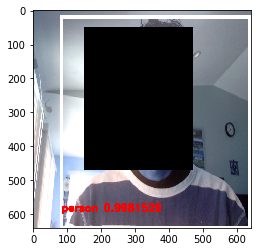

In [215]:
top_class_label= class_dict[classes_id[0][0].numpy()]
top_class_label
bounding_boxes =boxes[0]
top_bounding_box = bounding_boxes[0].numpy()

top_bounding_box_y_min = int(top_bounding_box[0]* 640)
top_bounding_box_x_min = int(top_bounding_box[1]* 640)
top_bounding_box_y_max = int(top_bounding_box[2]* 640)
top_bounding_box_x_max = int(top_bounding_box[3]* 640)
print ('top_bounding_box_y_min',top_bounding_box_y_min)
print ('top_bounding_box_x_min',top_bounding_box_x_min)
print ('top_bounding_box_y_max',top_bounding_box_y_max)
print ('top_bounding_box_x_max',top_bounding_box_x_max)
top_score=scores[0][0]
top_score = top_score.numpy()
resized_img = read_image_and_resize(input_file, desired_width, desired_height)
image_object_box =resized_img.copy()
cv2.rectangle(image_object_box, (top_bounding_box_x_min,top_bounding_box_y_max), (top_bounding_box_x_max,top_bounding_box_y_min), (255,255,255), 10)
cv2.putText(image_object_box, top_class_label +' ' + str(top_score),
                    (top_bounding_box_x_min, top_bounding_box_y_max - 50),
                    cv2.FONT_HERSHEY_DUPLEX,1.0, (255, 0, 0), 3,cv2.LINE_AA)
image_object_box[50:470,150:470]=  [0, 0, 0]
plt.imshow(image_object_box)

second_class_label clock
top_bounding_box_y_min 330
top_bounding_box_x_min 566
top_bounding_box_y_max 372
top_bounding_box_x_max 591
second_score 0.9126661


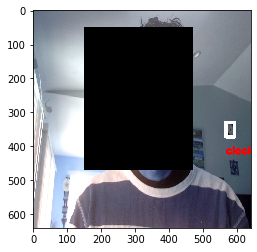

In [216]:
classes_id[0][1]
second_class_label= class_dict[classes_id[0][1].numpy()]
second_class_label
print ('second_class_label',second_class_label)
bounding_boxes =boxes[0]
second_bounding_box = bounding_boxes[1].numpy()

second_bounding_box_y_min = int(second_bounding_box[0]* 640)
second_bounding_box_x_min = int(second_bounding_box[1]* 640)
second_bounding_box_y_max = int(second_bounding_box[2]* 640)
second_bounding_box_x_max = int(second_bounding_box[3]* 640)
print ('top_bounding_box_y_min',second_bounding_box_y_min)
print ('top_bounding_box_x_min',second_bounding_box_x_min)
print ('top_bounding_box_y_max',second_bounding_box_y_max)
print ('top_bounding_box_x_max',second_bounding_box_x_max)
second_score=scores[0][1]
second_score = second_score.numpy()
print ('second_score',second_score)
desired_width=640
desired_height=640
resized_img = read_image_and_resize(input_file, desired_width, desired_height)
image_object_box =resized_img.copy()
cv2.rectangle(image_object_box, (second_bounding_box_x_min,second_bounding_box_y_max), (second_bounding_box_x_max,second_bounding_box_y_min), (255,255,255), 10)
cv2.putText(image_object_box, second_class_label +' ' + str(second_score),
                    (second_bounding_box_x_min, second_bounding_box_y_max + 50),
                    cv2.FONT_HERSHEY_DUPLEX,1.0, (255, 0, 0), 3,cv2.LINE_AA)
image_object_box[50:470,150:470]=  [0, 0, 0]
plt.imshow(image_object_box)